# Trabajo Práctico 3 - Big Data UNT
## Análisis Descriptivo y Predicción de Desocupación

### Parte 1: Analizando la base

#### Ejercicio 2

In [4]:
# Carga de las bases de datos individuales de la EPH para el primer trimestre de 2004 y 2024

import pandas as pd 

#base2004=pd.read_stata("C:/Users/valen/Dropbox/GitHub/TP0-Grupo2/TP3/usu_individual_T104.dta", convert_categoricals=False)
#base2004=pd.read_stata("C:/Users/Guadalupe Gorostiaga/Documents/GitHub/TP0-Grupo2/TP3/usu_individual_T104.dta", convert_categoricals=False)
#base2024=pd.read_excel("C:/Users/valen/Dropbox/GitHub/TP0-Grupo2/TP3/usu_individual_T124.xlsx")
#base2024=pd.read_excel("C:/Users/Guadalupe Gorostiaga/Documents/GitHub/TP0-Grupo2/TP3/usu_individual_T124.xlsx")

base2004=pd.read_stata("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP3/usu_individual_T104.dta", convert_categoricals=False)
base2024=pd.read_excel("C:/Users/Guadalupe Gorostiaga/Desktop/MAESTRÍA UNT/5. Big Data/TPs/TP3/usu_individual_T124.xlsx")

In [5]:
#Unificamos los nombres de las columnas de ambos data frame, dejando todo en minúsculas
base2004.columns=base2004.columns.str.lower()
base2024.columns=base2024.columns.str.lower()

In [6]:
#Observamos la estructura de los datos
print(base2004)
print(base2024)

         codusu  nro_hogar  componente  h15    ano4  trimestre  region  \
0      125098          1.0         1.0  1.0  2004.0        1.0     1.0   
1      125397          1.0         1.0  1.0  2004.0        1.0     1.0   
2      125515          1.0         1.0  1.0  2004.0        1.0     1.0   
3      125558          1.0         1.0  1.0  2004.0        1.0     1.0   
4      125558          1.0         2.0  1.0  2004.0        1.0     1.0   
...         ...        ...         ...  ...     ...        ...     ...   
45284  285733          1.0         1.0  1.0  2004.0        1.0    44.0   
45285  285733          1.0         2.0  1.0  2004.0        1.0    44.0   
45286  285733          1.0         3.0  1.0  2004.0        1.0    44.0   
45287  285733          1.0         4.0  0.0  2004.0        1.0    44.0   
45288  285733          1.0         5.0  0.0  2004.0        1.0    44.0   

      mas_500  aglomerado  pondera  ...  deccfr  ideccfr  rdeccfr  gdeccfr  \
0           S        32.0   1299.

#### Ejercicio 2.a.

In [8]:
## Eliminamos todas las observaciones de ambas bases que no corresponden al aglomerado Gran Tucumán - Tafí Viejo

base2004_tuc=base2004[base2004['aglomerado']==29]
base2024_tuc=base2024[base2024['aglomerado']==29]

In [9]:
#Comparamos la estructura de las bases antes y después del filtrado de las observaciones

print("base2004 shape:", base2004.shape)  # (filas, columnas)
print("base2024 shape:", base2024.shape)  

print("base2004_tuc shape:", base2004_tuc.shape)  
print("base2024_tuc shape:", base2024_tuc.shape)  

base2004 shape: (45289, 176)
base2024 shape: (46050, 177)
base2004_tuc shape: (2547, 176)
base2024_tuc shape: (2109, 177)


In [10]:
#Unimos ambas bases en una sola
base = pd.concat([base2004_tuc, base2024_tuc], ignore_index=True)
print(base)

                             codusu  nro_hogar  componente  h15    ano4  \
0                          125463          1.0         1.0  1.0  2004.0   
1                          125463          1.0         2.0  1.0  2004.0   
2                          125463          1.0         3.0  0.0  2004.0   
3                          125463          1.0         4.0  0.0  2004.0   
4                          125463          1.0         5.0  1.0  2004.0   
...                             ...        ...         ...  ...     ...   
4651  TQRMNORUYHMOLUCDEHPJB00801354        1.0         2.0  1.0  2024.0   
4652  TQRMNORUYHMOLUCDEHPJB00801354        1.0         3.0  1.0  2024.0   
4653  TQRMNORUYHMOLUCDEHPJB00801354        1.0         4.0  1.0  2024.0   
4654  TQRMNORUYHMOLUCDEHPJB00801354        1.0         5.0  0.0  2024.0   
4655  TQRMNOPWPHLMLPCDEHPJB00854501        1.0         1.0  1.0  2024.0   

      trimestre  region mas_500  aglomerado  pondera  ...  adeccfr  pj1_1  \
0           1.0    40.

#### Ejercicio 2.b.

In [12]:
#Vemos una descripción de los datos
subset = base[['codusu', 'nro_hogar', 'componente', 'ano4', 'ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]

for col in subset.select_dtypes(include=['float64']).columns:
    subset[col] = subset[col].astype(int)

# Mostrar un resumen estadístico para esas columnas
print(subset)
print(subset.describe(include='all'))

                             codusu  nro_hogar  componente  ano4  ch04  ch06  \
0                          125463            1           1  2004     1    30   
1                          125463            1           2  2004     2    25   
2                          125463            1           3  2004     2     5   
3                          125463            1           4  2004     1    -1   
4                          125463            1           5  2004     2    64   
...                             ...        ...         ...   ...   ...   ...   
4651  TQRMNORUYHMOLUCDEHPJB00801354          1           2  2024     2    35   
4652  TQRMNORUYHMOLUCDEHPJB00801354          1           3  2024     1    18   
4653  TQRMNORUYHMOLUCDEHPJB00801354          1           4  2024     2    14   
4654  TQRMNORUYHMOLUCDEHPJB00801354          1           5  2024     1     7   
4655  TQRMNOPWPHLMLPCDEHPJB00854501          1           1  2024     1    50   

      ch07  ch08  nivel_ed  estado  cat

C:\Users\Guadalupe Gorostiaga\AppData\Local\Temp\ipykernel_13040\3991099973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[col] = subset[col].astype(int)
C:\Users\Guadalupe Gorostiaga\AppData\Local\Temp\ipykernel_13040\3991099973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset[col] = subset[col].astype(int)
C:\Users\Guadalupe Gorostiaga\AppData\Local\Temp\ipykernel_13040\3991099973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [13]:
# Del resumen estadístico anterior, identificamos que la variable de edad 'ch06' tiene valores negativos
# Eliminamos estos valores sin sentido

subset=subset[subset['ch06']>=0]
subset

,codusu,nro_hogar,componente,ano4,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf
0,125463,1,1,2004,1,30,2,1,4,1,0,116
1,125463,1,2,2004,2,25,2,1,5,3,4,116
2,125463,1,3,2004,2,5,5,1,1,4,5,116
4,125463,1,5,2004,2,64,4,4,1,3,4,116
5,125571,1,2,2004,2,59,4,4,1,1,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
4651,TQRMNORUYHMOLUCDEHPJB00801354,1,2,2024,2,35,1,1,2,1,0,85800
4652,TQRMNORUYHMOLUCDEHPJB00801354,1,3,2024,1,18,5,4,4,3,7,85800
4653,TQRMNORUYHMOLUCDEHPJB00801354,1,4,2024,2,14,5,4,3,3,3,85800
4654,TQRMNORUYHMOLUCDEHPJB00801354,1,5,2024,1,7,5,4,1,4,3,85800


#### Ejercicio 2.c.

<Figure size 1000x600 with 0 Axes>

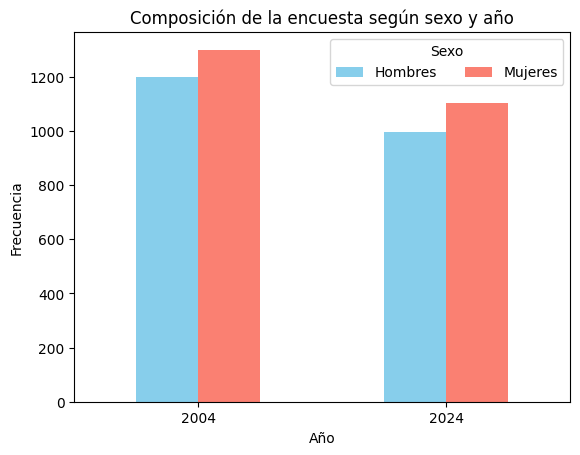

In [15]:
#Composición de la muestra según sexo y año
import matplotlib.pyplot as plt

#Creamos una base de datos que agrupe los datos según sexo y año
subset_sexo = subset.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
#Gráfico de barras
plt.figure(figsize=(10, 6))
subset_sexo.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Composición de la encuesta según sexo y año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
#plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title='Sexo', loc='upper right', ncol=2, labels=['Hombres', 'Mujeres'])
plt.show()

#### Ejercicio 2.d.

In [17]:
#Realizamos una matriz de correlación para las variables de interés que incluimos en el subset
#Elegimos la correlación de spearman porque la mayoría de los datos son categóricos

# Subconjunto para el año 2024
subset_2004 = subset[subset['ano4'] == 2004]
corr_spearman_2004 = subset_2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']].corr(method='spearman')

# Subconjunto para el año 2024
subset_2024 = subset[subset['ano4'] == 2024]
corr_spearman_2024 = subset_2024[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']].corr(method='spearman')

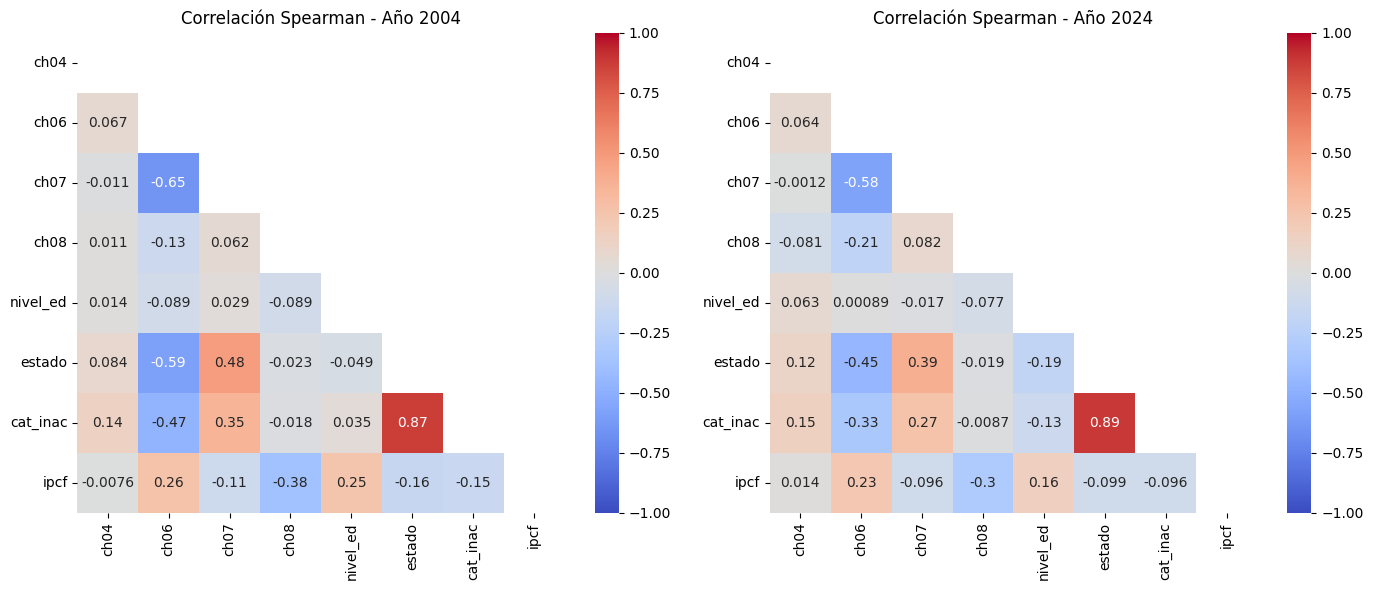

In [18]:
#Graficamos la matriz de correlación mejorando el Heatmap usual
import seaborn as sns
import numpy as np

# Eliminamos con este comando el triángulo superior de la matriz de correlación
mask_2004 = np.triu(np.ones_like(corr_spearman_2004, dtype=bool))
mask_2024 = np.triu(np.ones_like(corr_spearman_2024, dtype=bool))

fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Para 2004
sns.heatmap(corr_spearman_2004, mask=mask_2004, annot=True, cmap="coolwarm", ax=axes[0], vmin=-1, vmax=1, yticklabels=True)
axes[0].set_title('Correlación Spearman - Año 2004')
#plt.yticks(rotation=0)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0) 

# Para 2024
sns.heatmap(corr_spearman_2024, mask=mask_2024, annot=True, cmap="coolwarm", ax=axes[1], vmin=-1, vmax=1, yticklabels=True)
axes[1].set_title('Correlación Spearman - Año 2024')
#plt.yticks(rotation=0)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0) 

# Mostrar gráfico
plt.tight_layout()
plt.show()




#### Ejercicio 2.e.

In [20]:
#Contamos el número de desocupados en la muestra
print('Cantidad de desocupados en el total de la muestra:', subset[subset['estado'] == 2]['estado'].count())
#Contamos el número de desocupados en la muestra por cada año
print('Cantidad de desocupados en la muestra de 2004:', subset[(subset['estado'] == 2) & (subset['ano4'] == 2004)]['estado'].count())
print('Cantidad de desocupados en la muestra de 2024:', subset[(subset['estado'] == 2) & (subset['ano4'] == 2024)]['estado'].count())

#Hay que tener en cuenta que el tamaño de la muestra en 2024 es menor, por lo que estos números no nos dicen nada sobre la evolución real de la desocupación

Cantidad de desocupados en el total de la muestra: 259
Cantidad de desocupados en la muestra de 2004: 178
Cantidad de desocupados en la muestra de 2024: 81


In [21]:
#Definimos una función para calcular la proporción de desocupados por año
def proporcion_desocupados(subset, ano):
    total_desocupados = subset[(subset['estado'] == 2) & (subset['ano4'] == ano)]
    total_muestra = subset[(subset['ano4'] == ano)]
    
    proporcion = (total_desocupados['estado'].count() / total_muestra['estado'].count()) * 100
    return proporcion

# Mostrar proporciones de desocupados para cada año
print(f'Proporción de desocupados en 2004: {proporcion_desocupados(subset, 2004):.2f}%')
print(f'Proporción de desocupados en 2024: {proporcion_desocupados(subset, 2024):.2f}%')

Proporción de desocupados en 2004: 7.12%
Proporción de desocupados en 2024: 3.86%


In [22]:
#Contamos el número de inactivos en la muestra
print('Cantidad de inactivos en el total de la muestra:', subset[subset['estado'] == 3]['estado'].count())
#Contamos el número de inactivos en la muestra por cada año
print('Cantidad de inactivos en la muestra de 2004:', subset[(subset['estado'] == 3) & (subset['ano4'] == 2004)]['estado'].count())
print('Cantidad de inactivos en la muestra de 2024:', subset[(subset['estado'] == 3) & (subset['ano4'] == 2024)]['estado'].count())

#Hay que tener en cuenta que el tamaño de la muestra en 2024 es menor, por lo que estos números no nos dicen nada sobre la evolución real de la inactividad

Cantidad de inactivos en el total de la muestra: 1842
Cantidad de inactivos en la muestra de 2004: 973
Cantidad de inactivos en la muestra de 2024: 869


In [23]:
#Definimos una función para calcular la proporción de inactivos por año
def proporcion_inactivos(subset, ano):
    total_inactivos = subset[(subset['estado'] == 3) & (subset['ano4'] == ano)]
    total_muestra = subset[(subset['ano4'] == ano)]
    
    proporcion = (total_inactivos['estado'].count() / total_muestra['estado'].count()) * 100
    return proporcion

# Mostrar proporciones de inactivos para cada año
print(f'Proporción de inactivos en 2004: {proporcion_inactivos(subset, 2004):.2f}%')
print(f'Proporción de inactivos en 2024: {proporcion_inactivos(subset, 2024):.2f}%')

Proporción de inactivos en 2004: 38.90%
Proporción de inactivos en 2024: 41.42%


In [24]:
#Calculamos el promedio del ingreso per cápita familiar según estado de actividad

print(f'Ingreso per cápita familiar promedio de los ocupados: {subset[subset['estado'] == 1]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los desocupados: {subset[subset['estado'] == 2]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los inactivos: {subset[subset['estado'] == 3]['ipcf'].mean():.2f}')
#están expresados en valores nominales por lo que no tienen mucho sentido, debemos comparar por año

#Calculamos el promedio del ingreso per cápita familiar según estado de actividad y año
print(f'Ingreso per cápita familiar promedio de los ocupados en 2004: {subset[(subset['estado'] == 1) & (subset['ano4'] == 2004)]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los desocupados en 2004: {subset[(subset['estado'] == 2) & (subset['ano4'] == 2004)]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los inactivos en 2004: {subset[(subset['estado'] == 3) & (subset['ano4'] == 2004)]['ipcf'].mean():.2f}')

print(f'Ingreso per cápita familiar promedio de los ocupados en 2024: {subset[(subset['estado'] == 1) & (subset['ano4'] == 2024)]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los desocupados en 2024: {subset[(subset['estado'] == 2) & (subset['ano4'] == 2024)]['ipcf'].mean():.2f}')
print(f'Ingreso per cápita familiar promedio de los inactivos en 2024: {subset[(subset['estado'] == 3) & (subset['ano4'] == 2024)]['ipcf'].mean():.2f}')

Ingreso per cápita familiar promedio de los ocupados: 77186.93
Ingreso per cápita familiar promedio de los desocupados: 31834.35
Ingreso per cápita familiar promedio de los inactivos: 60272.36
Ingreso per cápita familiar promedio de los ocupados en 2004: 254.76
Ingreso per cápita familiar promedio de los desocupados en 2004: 142.57
Ingreso per cápita familiar promedio de los inactivos en 2004: 204.55
Ingreso per cápita familiar promedio de los ocupados en 2024: 152318.01
Ingreso per cápita familiar promedio de los desocupados en 2024: 101478.01
Ingreso per cápita familiar promedio de los inactivos en 2024: 127528.96


### Ejercicio 3

In [42]:
#Cantidad de personas que no respondieron su condición de actividad
print('Cantidad de personas que no respondieron su condición de actividad:', subset[subset['estado'] == 0]['estado'].count())

Cantidad de personas que no respondieron su condición de actividad: 10


In [44]:
#Dividimos la base entre personas que respondieron la condición de actividad y las que no

respondieron=subset.loc[subset['estado']!=0].copy()
norespondieron=subset.loc[subset['estado']==0].copy()

print("respondieron shape:", respondieron.shape) 
print("norespondieron shape:", norespondieron.shape) 

respondieron shape: (4589, 12)
norespondieron shape: (10, 12)


### Ejercicio 4

<Figure size 1000x600 with 0 Axes>

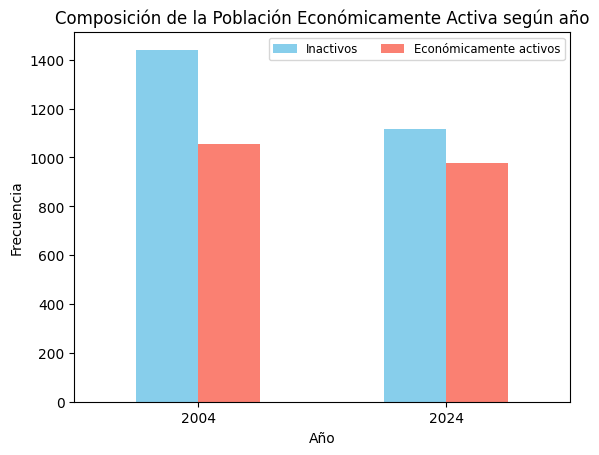

In [47]:
#A la base respondieron agregamos una columna llamada PEA que toma 1 si están ocupados o desocupados en ESTADO

respondieron['pea'] = np.where((respondieron['estado']==1) | (respondieron['estado']==2), 1, 0)

#Realizamos un gráfico de barra mostrando la composición por PEA para 2004 y 2024

subset_pea = respondieron.groupby(['ano4', 'pea']).size().unstack(fill_value=0)

#Gráfico de barras
plt.figure(figsize=(10, 6))
subset_pea.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Composición de la Población Económicamente Activa según año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
#plt.legend(title='PEA')
plt.legend(loc='upper right', ncol=2, labels=['Inactivos', 'Económicamente activos'], fontsize='small')
plt.show()

### Ejercicio 5

<Figure size 1000x600 with 0 Axes>

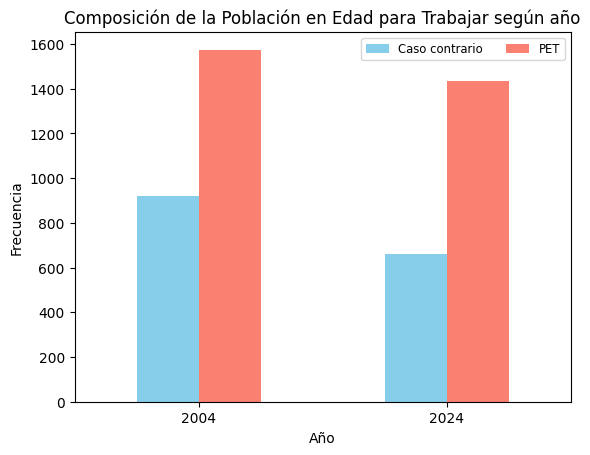

In [50]:
#A la base respondieron agregamos una columna llamada PET que toma 1 si la persona tiene entre 15 y 65

respondieron['pet'] = np.where((respondieron['ch06']>=15) & (respondieron['ch06']<=65), 1, 0)

#Realizamos un gráfico de barra mostrando la composición por PET para 2004 y 2024

subset_pet = respondieron.groupby(['ano4', 'pet']).size().unstack(fill_value=0)

#Gráfico de barras
plt.figure(figsize=(10, 6))
subset_pet.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Composición de la Población en Edad para Trabajar según año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0) 
plt.legend(loc='upper right', ncol=2, labels=['Caso contrario', 'PET'], fontsize='small')
plt.show()

### Ejercicio 6.

In [53]:
#Agregamos a la base respondieron una columna llamada desocupado que toma el valor 1 si esta desocupado

respondieron['desocupado'] = np.where(respondieron['estado']==2, 1, 0)

print('Cantidad de desocupados en la muestra de 2004:', respondieron[(respondieron['estado'] == 2) & (respondieron['ano4'] == 2004)]['estado'].count())
print('Cantidad de desocupados en la muestra de 2024:', respondieron[(respondieron['estado'] == 2) & (respondieron['ano4'] == 2024)]['estado'].count())

#Misma cantidad que contamos anteriormente, lo cual tiene sentido

Cantidad de desocupados en la muestra de 2004: 178
Cantidad de desocupados en la muestra de 2024: 81


#### Ejercicio 6.a.

In [56]:
# Definimos una función para calcular la proporción de desocupados por nivel educativo y año

def proporcion_por_nivel(respondieron, nivel_ed, ano):
    total_desocupados = respondieron[(respondieron['desocupado'] == 1) & (respondieron['ano4'] == ano)]
    desocupados_nivel = total_desocupados[total_desocupados['nivel_ed'] == nivel_ed]
    
    proporcion = (desocupados_nivel['desocupado'].count() / total_desocupados['desocupado'].count()) * 100
    return proporcion

# Definimos un diccionario con los niveles educativos 
niveles_educativos = {
    1: 'Primario incompleto',
    2: 'Primario completo',
    3: 'Secundario incompleto',
    4: 'Secundario completo',
    5: 'Universitario incompleto',
    6: 'Universitario completo',
    7: 'Sin instrucción'
}

# Proporciones de desocupados para cada nivel educativo en 2004 y 2024
for nivel, descripcion in niveles_educativos.items():
    print(f'Proporción de desocupados con {descripcion} en 2004: {proporcion_por_nivel(respondieron, nivel, 2004):.2f}%')
    print(f'Proporción de desocupados con {descripcion} en 2024: {proporcion_por_nivel(respondieron, nivel, 2024):.2f}%')


Proporción de desocupados con Primario incompleto en 2004: 6.74%
Proporción de desocupados con Primario incompleto en 2024: 2.47%
Proporción de desocupados con Primario completo en 2004: 23.60%
Proporción de desocupados con Primario completo en 2024: 12.35%
Proporción de desocupados con Secundario incompleto en 2004: 15.17%
Proporción de desocupados con Secundario incompleto en 2024: 24.69%
Proporción de desocupados con Secundario completo en 2004: 20.79%
Proporción de desocupados con Secundario completo en 2024: 32.10%
Proporción de desocupados con Universitario incompleto en 2004: 28.65%
Proporción de desocupados con Universitario incompleto en 2024: 18.52%
Proporción de desocupados con Universitario completo en 2004: 4.49%
Proporción de desocupados con Universitario completo en 2024: 9.88%
Proporción de desocupados con Sin instrucción en 2004: 0.56%
Proporción de desocupados con Sin instrucción en 2024: 0.00%


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Contamos el número de desocupados por nivel educativo y año
desocupados = respondieron[respondieron['estado'] == 2].groupby(['ano4', 'nivel_ed']).size().unstack(fill_value=0)

# Contamos el total de personas por nivel educativo
total_por_nivel = respondieron.groupby(['ano4', 'nivel_ed']).size().unstack(fill_value=0)

# Calculamos la proporción de desocupados
proporcion_desocupados = desocupados.div(total_por_nivel) * 100

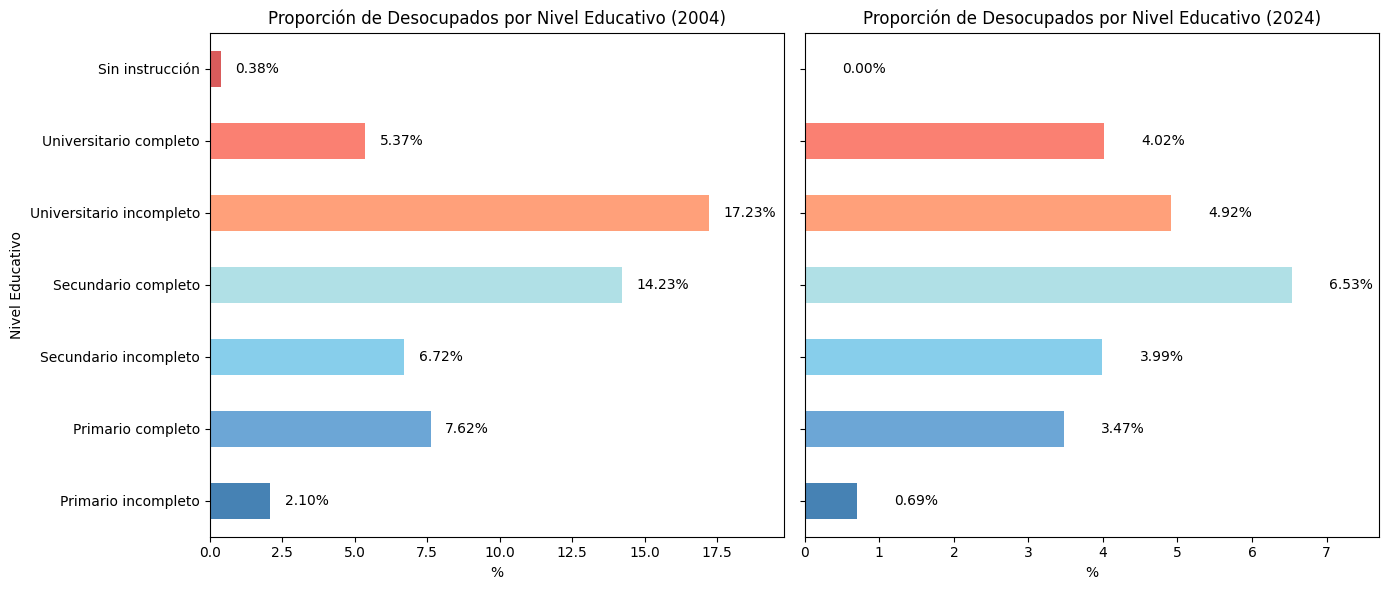

In [60]:
# Gráfico de barras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # compartan el mismo eje Y

# Gráfico para el año 2004
etiquetas_nivel_educativo_2004 = proporcion_desocupados.loc[2004].index.map(niveles_educativos) # Mapeamos los índices a las etiquetas
barras_2004 = proporcion_desocupados.loc[2004].plot(kind='barh', ax=ax1, 
                                                    color=['steelblue', '#6CA6D6', 'skyblue', 'powderblue', 'lightsalmon', 'salmon', '#D95B5B'])
ax1.set_title('Proporción de Desocupados por Nivel Educativo (2004)')
ax1.set_xlabel('%')
ax1.set_ylabel('Nivel Educativo')
# Asignamos etiquetas de niveles educativos al eje y (vale para 2004 y 2024)
ax1.set_yticks(range(len(etiquetas_nivel_educativo_2004))) 
ax1.set_yticklabels(etiquetas_nivel_educativo_2004)
# Agregamos porcentaje a las barras del gráfico de 2004
for i, valor in enumerate(proporcion_desocupados.loc[2004]):
    ax1.text(valor + 0.5, i, f'{valor:.2f}%', va='center', color='black')
ax1.margins(x=0.15)

# Gráfico para el año 2024
etiquetas_nivel_educativo_2024 = proporcion_desocupados.loc[2024].index.map(niveles_educativos) # Mapeamos los índices a las etiquetas
barras_2024 = proporcion_desocupados.loc[2024].plot(kind='barh', ax=ax2, 
                                                    color=['steelblue', '#6CA6D6', 'skyblue', 'powderblue', 'lightsalmon', 'salmon', '#D95B5B'])
ax2.set_title('Proporción de Desocupados por Nivel Educativo (2024)')
ax2.set_xlabel('%')
# Asignamos etiquetas de niveles educativos al eje y (vale para 2004 y 2024)
ax1.set_yticks(range(len(etiquetas_nivel_educativo_2004))) 
ax1.set_yticklabels(etiquetas_nivel_educativo_2004)
# Agregamos porcentaje a las barras del gráfico de 2024
for i, valor in enumerate(proporcion_desocupados.loc[2024]):
    ax2.text(valor + 0.5, i, f'{valor:.2f}%', va='center', color='black')
ax2.margins(x=0.18)

plt.tight_layout()
plt.show()

#### Ejercicio 6.b.

In [63]:
#Creamos una variable categórica de años cumplidos agrupando de a 10 años
respondieron['rango_edad'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])

In [65]:
#Comparamos la composición de desocupados por rango etario y año

# Primero definimos una función para calcular la proporción de desocupados por rango de edad y año
def proporcion_por_rango_edad(respondieron, rango_edad, ano):
    total_desocupados = respondieron[(respondieron['desocupado'] == 1) & (respondieron['ano4'] == ano)]
    desocupados_rango = total_desocupados[total_desocupados['rango_edad'] == rango_edad]
    
    proporcion = (desocupados_rango['desocupado'].count() / total_desocupados['desocupado'].count()) * 100
    return proporcion

#Definimos los rangos de edad de la variable que creamos
rangos_edad = respondieron['rango_edad'].cat.categories

# Mostrar proporciones para cada rango de edad en 2004 y 2024
for rango in rangos_edad:
    print(f'Proporción de desocupados con edad {rango} en 2004: {proporcion_por_rango_edad(respondieron, rango, 2004):.2f}%')
    print(f'Proporción de desocupados con edad {rango} en 2024: {proporcion_por_rango_edad(respondieron, rango, 2024):.2f}%')

Proporción de desocupados con edad 0-9 en 2004: 0.00%
Proporción de desocupados con edad 0-9 en 2024: 0.00%
Proporción de desocupados con edad 10-19 en 2004: 15.17%
Proporción de desocupados con edad 10-19 en 2024: 11.11%
Proporción de desocupados con edad 20-29 en 2004: 47.19%
Proporción de desocupados con edad 20-29 en 2024: 43.21%
Proporción de desocupados con edad 30-39 en 2004: 18.54%
Proporción de desocupados con edad 30-39 en 2024: 18.52%
Proporción de desocupados con edad 40-49 en 2004: 10.67%
Proporción de desocupados con edad 40-49 en 2024: 14.81%
Proporción de desocupados con edad 50-59 en 2004: 5.62%
Proporción de desocupados con edad 50-59 en 2024: 7.41%
Proporción de desocupados con edad 60-69 en 2004: 2.25%
Proporción de desocupados con edad 60-69 en 2024: 4.94%
Proporción de desocupados con edad 70-79 en 2004: 0.56%
Proporción de desocupados con edad 70-79 en 2024: 0.00%
Proporción de desocupados con edad 80-89 en 2004: 0.00%
Proporción de desocupados con edad 80-89 en 

In [67]:
# Contamos el número de desocupados por rango etario y año
desocupados = respondieron[respondieron['estado'] == 2].groupby(['ano4', 'rango_edad'], observed=False).size().unstack(fill_value=0)

# Contamos el total de personas por rango etario
total_por_rango_edad = respondieron.groupby(['ano4', 'rango_edad'], observed=False).size().unstack(fill_value=0)

# Calculamos la proporción de desocupados
proporcion_desocupados = desocupados.div(total_por_rango_edad) * 100

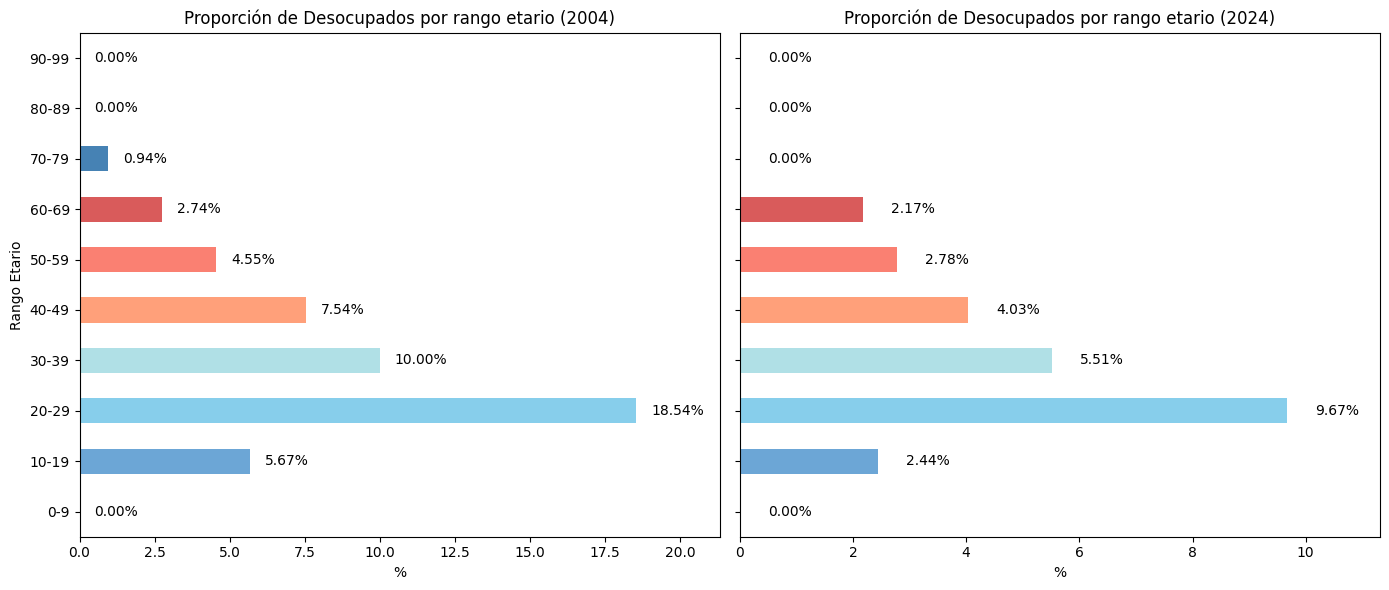

In [69]:
# Gráfico de barras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # compartan el mismo eje Y

# Gráfico para el año 2004
barras_2004 = proporcion_desocupados.loc[2004].plot(kind='barh', ax=ax1, 
                                                    color=['steelblue', '#6CA6D6', 'skyblue', 'powderblue', 'lightsalmon', 'salmon', '#D95B5B'])
ax1.set_title('Proporción de Desocupados por rango etario (2004)')
ax1.set_xlabel('%')
ax1.set_ylabel('Rango Etario')
# Agregamos porcentaje a las barras del gráfico de 2004
for i, valor in enumerate(proporcion_desocupados.loc[2004]):
    ax1.text(valor + 0.5, i, f'{valor:.2f}%', va='center', color='black')
ax1.margins(x=0.15)

# Gráfico para el año 2024
barras_2024 = proporcion_desocupados.loc[2024].plot(kind='barh', ax=ax2, 
                                                    color=['steelblue', '#6CA6D6', 'skyblue', 'powderblue', 'lightsalmon', 'salmon', '#D95B5B'])
ax2.set_title('Proporción de Desocupados por rango etario (2024)')
ax2.set_xlabel('%')
# Agregamos porcentaje a las barras del gráfico de 2024
for i, valor in enumerate(proporcion_desocupados.loc[2024]):
    ax2.text(valor + 0.5, i, f'{valor:.2f}%', va='center', color='black')
ax2.margins(x=0.17)

plt.tight_layout()
plt.show()

### Ejercicio 7

In [72]:
#Calculamos la tasa de desocupación siguiendo a INDEC, tomando como referencia la Población Económicamente Activa

#Definimos una función para calcular la tasa de desocupación por año
def desocupacion_indec(respondieron, ano):
    total_desocupados = respondieron[(respondieron['desocupado'] == 1) & (respondieron['ano4'] == ano)]
    total_pea = respondieron[respondieron['pea'] == 1]
    
    tasa_desocup_indec = (total_desocupados['desocupado'].count()) / total_pea['desocupado'].count() * 100
    return tasa_desocup_indec

#Imprimimos la tasa de desocupación por año
print(f'Tasa de desocupación según INDEC en 2004: {desocupacion_indec(respondieron, 2004):.2f}%')
print(f'Tasa de desocupación según INDEC en 2024: {desocupacion_indec(respondieron, 2024):.2f}%')


Tasa de desocupación según INDEC en 2004: 8.76%
Tasa de desocupación según INDEC en 2024: 3.99%


In [74]:
#Calculamos la tasa de desocupación siguiendo la definición que usa la rama de economía laboral, tomando la Población en Edad para Trabajar

def desocupacion_laboral(respondieron, ano):
    total_desocupados = respondieron[(respondieron['desocupado'] == 1) & (respondieron['ano4'] == ano)]
    total_pet = respondieron[respondieron['pet'] == 1]
    
    tasa_desocup_laboral = (total_desocupados['desocupado'].count()) / total_pet['desocupado'].count() * 100
    return tasa_desocup_laboral

#Imprimimos la tasa de desocupación por año
print(f'Tasa de desocupación según Economía Laboral en 2004: {desocupacion_laboral(respondieron, 2004):.2f}%')
print(f'Tasa de desocupación según Economía Laboral en 2024: {desocupacion_laboral(respondieron, 2024):.2f}%')

#Las tasas son menores porque la base es más amplia

Tasa de desocupación según Economía Laboral en 2004: 5.92%
Tasa de desocupación según Economía Laboral en 2024: 2.69%


## Parte 2: Clasificación

### Ejercicio 1

In [78]:
#Partimos la base respondieron según el año
# Subconjunto para el año 2024
respondieron_2004 = respondieron[respondieron['ano4'] == 2004]
print(respondieron_2004)

# Subconjunto para el año 2024
respondieron_2024 = respondieron[respondieron['ano4'] == 2024]

        codusu  nro_hogar  componente  ano4  ch04  ch06  ch07  ch08  nivel_ed  \
0     125463            1           1  2004     1    30     2     1         4   
1     125463            1           2  2004     2    25     2     1         5   
2     125463            1           3  2004     2     5     5     1         1   
4     125463            1           5  2004     2    64     4     4         1   
5     125571            1           2  2004     2    59     4     4         1   
...        ...        ...         ...   ...   ...   ...   ...   ...       ...   
2542  288280            1           3  2004     2     6     5     1         1   
2543  288280            1           4  2004     1     4     5     1         7   
2544  288280            1           5  2004     1     1     5     1         7   
2545  288337            1           1  2004     1    75     2    12         1   
2546  288337            1           2  2004     2    75     2    12         1   

      estado  cat_inac  ipc

In [80]:
# Importamos la función train_test_split
from sklearn.model_selection import train_test_split

In [82]:
#Separamos las variables independientes de la que queremos predecir
X_2004 = respondieron_2004.drop(columns=['desocupado','codusu', 'nro_hogar', 'componente', 'ano4', 'estado', 'rango_edad', 'pea', 'pet'])
y_2004 = respondieron_2004['desocupado']

X_2024 = respondieron_2024.drop(columns=['desocupado','codusu', 'nro_hogar', 'componente', 'ano4','estado', 'rango_edad', 'pea', 'pet'])
y_2024 = respondieron_2024['desocupado']

#Dividimos los datos en conjuntos de entrenamiento y prueba, manteniendo el 70% en entrenamiento
X_2004_train, X_2004_test, y_2004_train, y_2004_test = train_test_split(X_2004, y_2004, test_size=0.3, random_state=201)
X_2024_train, X_2024_test, y_2024_train, y_2024_test = train_test_split(X_2024, y_2024, test_size=0.3, random_state=201)

# Transformamos las variables categóricas en dummies para facilitar su interpretación
X_2004_train_encoded = pd.get_dummies(X_2004_train, drop_first=True)
X_2004_test_encoded = pd.get_dummies(X_2004_test, drop_first=True)

X_2024_train_encoded = pd.get_dummies(X_2024_train, drop_first=True)
X_2024_test_encoded = pd.get_dummies(X_2024_test, drop_first=True)

# Alineamos los conjuntos de entrenamiento y prueba para asegurarnos de que tienen las mismas columnas
X_2004_train_encoded, X_2004_test_encoded = X_2004_train_encoded.align(X_2004_test_encoded, join='left', axis=1, fill_value=0)
X_2024_train_encoded, X_2024_test_encoded = X_2024_train_encoded.align(X_2024_test_encoded, join='left', axis=1, fill_value=0)

# Agregar una columna de unos para la regresión logística (intercepto)
X_2004_train_encoded = np.c_[np.ones(X_2004_train_encoded.shape[0]), X_2004_train_encoded]
X_2004_test_encoded = np.c_[np.ones(X_2004_test_encoded.shape[0]), X_2004_test_encoded]

X_2024_train_encoded = np.c_[np.ones(X_2024_train_encoded.shape[0]), X_2024_train_encoded]
X_2024_test_encoded = np.c_[np.ones(X_2024_test_encoded.shape[0]), X_2024_test_encoded]

### Ejercicio 2

##### MÉTODO: Regresión Logística

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import RocCurveDisplay

Confusion Matrix for 2004:
[[699   5]
 [ 36   9]]
Accuracy Score: 0.945260347129506
AUC: 0.898
Thresholds: [       inf 0.70641017 0.61899287 0.60909599 0.58243475 0.56702309
 0.51733863 0.4968715  0.48148176 0.46105387 0.45912138 0.45121279
 0.44750911 0.44069154 0.44067781 0.42573522 0.42167845 0.40718622
 0.40650736 0.38039722 0.36683686 0.36344841 0.35849492 0.35791039
 0.35758972 0.35551729 0.35194901 0.30290143 0.29885008 0.29306294
 0.29164128 0.23909963 0.23828978 0.22587176 0.21836539 0.21053468
 0.20898973 0.1982702  0.19785682 0.17870305 0.17855453 0.17815627
 0.17773145 0.16843588 0.16833696 0.16621146 0.16609586 0.15996029
 0.15995903 0.15333759 0.15144951 0.15106422 0.15101725 0.14875434
 0.14291601 0.12038005 0.1203186  0.11457068 0.11270812 0.09730646
 0.09730481 0.09222621 0.09130064 0.08273546 0.08225039 0.07016076
 0.06987693 0.05976768 0.05932019 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
FPR: [0.         0.00142045 0

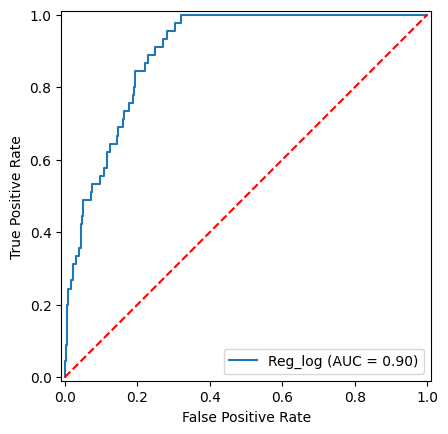

In [88]:
# Regresión Logística para 2004
log_reg_2004 = LogisticRegression(penalty=None).fit(X_2004_train_encoded, y_2004_train)
y_2004_pred = log_reg_2004.predict(X_2004_test_encoded)

# Obtener las probabilidades de predicción
y_2004_pred_score = log_reg_2004.predict_proba(X_2004_test_encoded)[:, 1]

# Cálculo de la Matriz de Confusión
cm_2004 = confusion_matrix(y_2004_test, y_2004_pred)
print('Confusion Matrix for 2004:')
print(cm_2004) 

# Cálculo del Accuracy
print('Accuracy Score:', accuracy_score(y_2004_test, y_2004_pred))

# Cálculo de AUC y la curva ROC
roc_auc_2004 = roc_auc_score(y_2004_test, y_2004_pred_score)
print('AUC: %.3f'% roc_auc_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, y_2004_pred_score)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_2004, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

Confusion Matrix for 2024:
[[600   2]
 [ 26   1]]
Accuracy Score: 0.9554848966613673
AUC: 0.759
Thresholds: [       inf 0.72278109 0.65826371 0.6116824  0.3295486  0.31600139
 0.30070907 0.29931867 0.27293019 0.26678372 0.24259801 0.2214965
 0.2004982  0.20036751 0.19714897 0.1869161  0.17620719 0.1751069
 0.15777313 0.1543278  0.14006705 0.13907543 0.13448091 0.13352604
 0.12268737 0.12239282 0.11801165 0.11623753 0.11480768 0.11451344
 0.09925864 0.09708723 0.05688334 0.0562751  0.05341556 0.05340409
 0.05180934 0.05171306 0.05133705 0.05091062 0.0493356  0.04924207
 0.04884941 0.04884887 0.04760111 0.04739513 0.0466704  0.04657176
 0.02335378 0.02297887 0.0174229  0.01713236 0.01500367 0.01490417
 0.00968143 0.00945438 0.00790895 0.00789295 0.00724836 0.00706823
 0.0057742  0.005436   0.00520209 0.00514413 0.00000091]
FPR: [0.         0.00166113 0.00332226 0.00332226 0.00664452 0.00664452
 0.00830565 0.00830565 0.01495017 0.01495017 0.02657807 0.02657807
 0.03654485 0.03654485 0.039

C:\Users\Guadalupe Gorostiaga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


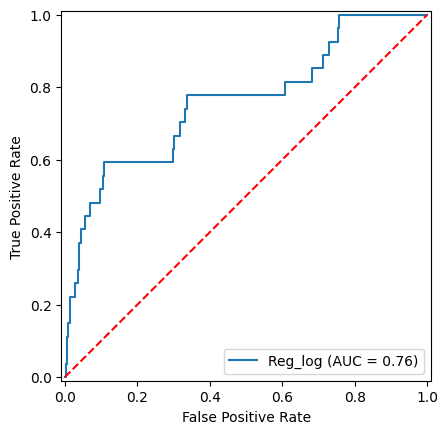

In [90]:
# Regresión Logística para 2024
log_reg_2024 = LogisticRegression(penalty=None).fit(X_2024_train_encoded, y_2024_train)
y_2024_pred = log_reg_2024.predict(X_2024_test_encoded)

# Obtener las probabilidades de predicción
y_2024_pred_score = log_reg_2024.predict_proba(X_2024_test_encoded)[:, 1]

# Cálculo de la Matriz de Confusión
cm_2024 = confusion_matrix(y_2024_test, y_2024_pred)
print('Confusion Matrix for 2024:')
print(cm_2024) 

# Cálculo del Accuracy
print('Accuracy Score:', accuracy_score(y_2024_test, y_2024_pred))

# Cálculo de AUC y la curva ROC
roc_auc_2024 = roc_auc_score(y_2024_test, y_2024_pred_score)
print('AUC: %.3f'% roc_auc_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, y_2024_pred_score)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_2024, estimator_name='Reg_log')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

##### MÉTODO: Análisis Discriminante Lineal

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Confusion Matrix for 2004:
[[704   0]
 [ 45   0]]
La exactitud del modelo es: 0.94
AUC: 0.500
Thresholds: [inf  0.]
FPR: [0. 1.]
TPR: [0. 1.]


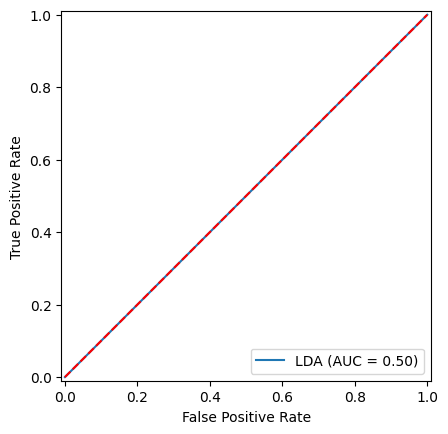

In [95]:
# Para el año 2004
lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(X_2004_train_encoded, y_2004_train)

# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_2004_pred_lda = lda.predict(X_2004_test_encoded)

# Cálculo de la Matriz de Confusión
cm_lda_2004 = confusion_matrix(y_2004_test, y_2004_pred_lda)
print('Confusion Matrix for 2004:')
print(cm_lda_2004)

# Cálculo del Accuracy
accuracy_lda = accuracy_score(y_2004_test, y_2004_pred_lda)
print("La exactitud del modelo es: %.2f" %accuracy_lda)

# Cálculo de AUC y la curva ROC
roc_auc_lda_2004 = roc_auc_score(y_2004_test, y_2004_pred_lda)
print('AUC: %.3f'% roc_auc_lda_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, y_2004_pred_lda)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_lda_2004, estimator_name='LDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

Confusion Matrix for 2024:
[[601   1]
 [ 26   1]]
La exactitud del modelo es: 0.96
AUC: 0.518
Thresholds: [inf  1.  0.]
FPR: [0.         0.00166113 1.        ]
TPR: [0.         0.03703704 1.        ]


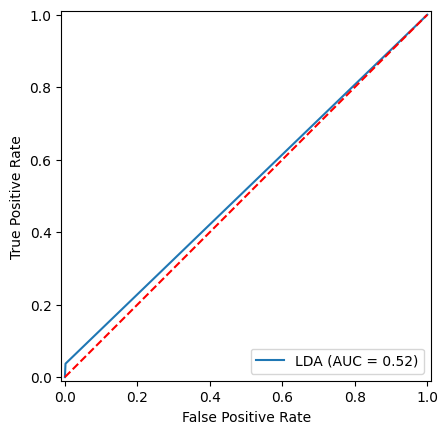

In [97]:
# Para el año 2024
lda = LinearDiscriminantAnalysis(n_components=1)
lda = lda.fit(X_2024_train_encoded, y_2024_train)

# Predecimos con el modelo de Análisis discriminante lineal sobre las X test
y_2024_pred_lda = lda.predict(X_2024_test_encoded)

# Cálculo de la Matriz de Confusión
cm_lda_2024 = confusion_matrix(y_2024_test, y_2024_pred_lda)
print('Confusion Matrix for 2024:')
print(cm_lda_2024)

# Cálculo del Accuracy
accuracy_lda = accuracy_score(y_2024_test, y_2024_pred_lda)
print("La exactitud del modelo es: %.2f" %accuracy_lda)

# Cálculo de AUC y la curva ROC
roc_auc_lda_2024 = roc_auc_score(y_2024_test, y_2024_pred_lda)
print('AUC: %.3f'% roc_auc_lda_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, y_2024_pred_lda)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_lda_2024, estimator_name='LDA')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show() 

##### MÉTODO: KNN con k=3

In [100]:
from sklearn.neighbors import KNeighborsClassifier

Confusion Matrix for 2004:
[[681  23]
 [ 35  10]]
La exactitud del modelo es: 0.923
AUC: 0.595
Thresholds: [inf  1.  0.]
FPR: [0.         0.03267045 1.        ]
TPR: [0.         0.22222222 1.        ]


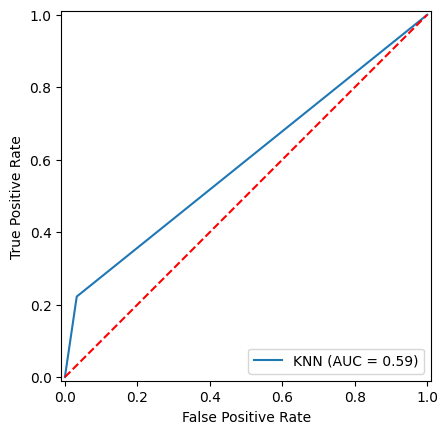

In [102]:
# Para 2004
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_2004_train_encoded, y_2004_train)

y_2004_pred_knn = knn.predict(X_2004_test_encoded)

# Cálculo de la Matriz de Confusión
cm_knn_2004 = confusion_matrix(y_2004_test, y_2004_pred_knn)
print('Confusion Matrix for 2004:')
print(cm_knn_2004)

# Cálculo del Accuracy
accuracy_knn = accuracy_score(y_2004_test, y_2004_pred_knn)
print("La exactitud del modelo es: %.3f" %accuracy_knn)

# Cálculo de AUC y la curva ROC
roc_auc_knn_2004 = roc_auc_score(y_2004_test, y_2004_pred_knn)
print('AUC: %.3f'% roc_auc_knn_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, y_2004_pred_knn)
np.set_printoptions(suppress = True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_knn_2004, estimator_name='KNN')
display.plot()  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

Confusion Matrix for 2024:
[[595   7]
 [ 25   2]]
La exactitud del modelo es: 0.949
AUC: 0.531
Thresholds: [inf  1.  0.]
FPR: [0.         0.01162791 1.        ]
TPR: [0.         0.07407407 1.        ]


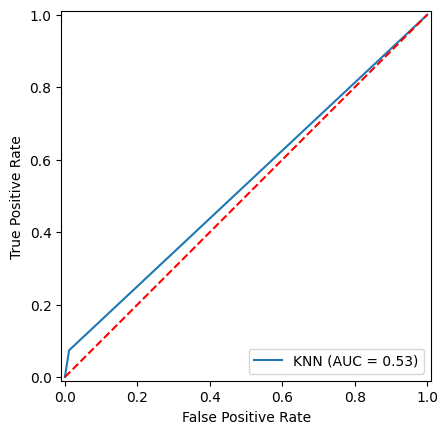

In [104]:
# Para 2024
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_2024_train_encoded, y_2024_train)

y_2024_pred_knn = knn.predict(X_2024_test_encoded)

# Cálculo de la Matriz de Confusión
cm_knn_2024 = confusion_matrix(y_2024_test, y_2024_pred_knn)
print('Confusion Matrix for 2024:')
print(cm_knn_2024)

# Cálculo del Accuracy
accuracy_knn = accuracy_score(y_2024_test, y_2024_pred_knn)
print("La exactitud del modelo es: %.3f" % accuracy_knn)

# Cálculo de AUC y la curva ROC
roc_auc_knn_2024 = roc_auc_score(y_2024_test, y_2024_pred_knn)
print('AUC: %.3f' % roc_auc_knn_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, y_2024_pred_knn)
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_knn_2024, estimator_name='KNN')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

##### MÉTODO: 
Naive Bayes

In [107]:
from sklearn.naive_bayes import GaussianNB

Confusion Matrix for 2004:
[[449 255]
 [  1  44]]
La exactitud del modelo es: 0.658
AUC: 0.808
Thresholds: [inf  1.  0.]
FPR: [0.         0.36221591 1.        ]
TPR: [0.         0.97777778 1.        ]


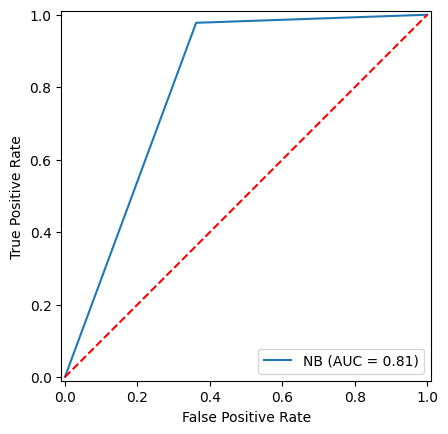

In [109]:
# Para 2004
NB = GaussianNB() 
NB.fit(X_2004_train_encoded, y_2004_train)

y_2004_pred_nb = NB.predict(X_2004_test_encoded)

# Cálculo de la Matriz de Confusión
cm_nb_2004 = confusion_matrix(y_2004_test, y_2004_pred_nb)
print('Confusion Matrix for 2004:')
print(cm_nb_2004)

# Cálculo del Accuracy
accuracy_nb = accuracy_score(y_2004_test, y_2004_pred_nb)
print("La exactitud del modelo es: %.3f" % accuracy_nb)

# Cálculo de AUC y la curva ROC
roc_auc_nb_2004 = roc_auc_score(y_2004_test, y_2004_pred_nb)
print('AUC: %.3f' % roc_auc_nb_2004)

fpr, tpr, thresholds = roc_curve(y_2004_test, y_2004_pred_nb)
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_nb_2004, estimator_name='NB')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

Confusion Matrix for 2024:
[[600   2]
 [ 27   0]]
La exactitud del modelo es: 0.954
AUC: 0.498
Thresholds: [inf  1.  0.]
FPR: [0.         0.00332226 1.        ]
TPR: [0. 0. 1.]


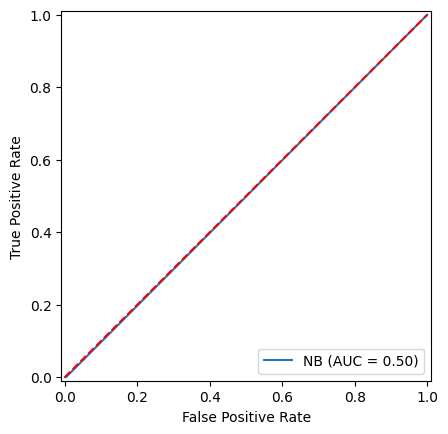

In [111]:
# Para 2024
NB = GaussianNB() 
NB.fit(X_2024_train_encoded, y_2024_train)

y_2024_pred_nb = NB.predict(X_2024_test_encoded)

# Cálculo de la Matriz de Confusión
cm_nb_2024 = confusion_matrix(y_2024_test, y_2024_pred_nb)
print('Confusion Matrix for 2024:')
print(cm_nb_2024)

# Cálculo del Accuracy
accuracy_nb = accuracy_score(y_2024_test, y_2024_pred_nb)
print("La exactitud del modelo es: %.3f" % accuracy_nb)

# Cálculo de AUC y la curva ROC
roc_auc_nb_2024 = roc_auc_score(y_2024_test, y_2024_pred_nb)
print('AUC: %.3f' % roc_auc_nb_2024)

fpr, tpr, thresholds = roc_curve(y_2024_test, y_2024_pred_nb)
np.set_printoptions(suppress=True)
print('Thresholds:', thresholds)
print('FPR:', fpr)
print('TPR:', tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_nb_2024, estimator_name='NB')
display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.show()

#### Ejercicio 4

In [114]:
#Partimos la base norespondieron según el año
norespondieron_2004 = norespondieron[norespondieron['ano4'] == 2004]
norespondieron_2024 = norespondieron[norespondieron['ano4'] == 2024]

# Ajustamos las variables independientes de la base norespondieron
X_norespondieron_2004 = norespondieron_2004.drop(columns=['codusu', 'nro_hogar', 'componente', 'ano4', 'estado'])
X_norespondieron_2024 = norespondieron_2024.drop(columns=['codusu', 'nro_hogar', 'componente', 'ano4', 'estado'])

# Transformamos variables categóricas en dummies
X_norespondieron_2004_encoded = pd.get_dummies(X_norespondieron_2004, drop_first=True)
X_norespondieron_2024_encoded = pd.get_dummies(X_norespondieron_2024, drop_first=True)

# Agregamos una columna de unos para la regresión logística (intercepto)
X_norespondieron_2004_encoded = np.c_[np.ones(X_norespondieron_2004_encoded.shape[0]), X_norespondieron_2004_encoded]
X_norespondieron_2024_encoded = np.c_[np.ones(X_norespondieron_2024_encoded.shape[0]), X_norespondieron_2024_encoded]

#X_norespondieron_2004_encoded = X_norespondieron_2004_encoded.reindex(columns=X_2004_train_encoded.columns, fill_value=0)
#X_norespondieron_2024_encoded = X_norespondieron_2024_encoded.reindex(columns=X_2024_train_encoded.columns, fill_value=0)


# Predecimos la desocupación en norespondieron según el modelo de regresión logística
y_norespondieron_2004_pred = log_reg_2004.predict(X_norespondieron_2004_encoded)
y_norespondieron_2024_pred = log_reg_2024.predict(X_norespondieron_2024_encoded)

# Crear un DataFrame para ver los resultados
norespondieron_resultados_2004 = norespondieron_2004.copy()
norespondieron_resultados_2004['desocupado_predicho'] = y_norespondieron_2004_pred

norespondieron_resultados_2024 = norespondieron_2024.copy()
norespondieron_resultados_2024['desocupado_predicho'] = y_norespondieron_2024_pred

# Calcular la proporción de desocupados identificados
proporcion_desocupados_identificados_2004 = norespondieron_resultados_2004['desocupado_predicho'].mean()
proporcion_desocupados_identificados_2024 = norespondieron_resultados_2024['desocupado_predicho'].mean()

# Mostrar la proporción
print(f'Proporción de personas en norespondieron identificadas como desocupadas en 2004: {proporcion_desocupados_identificados_2004:.2f}')
print(f'Proporción de personas en norespondieron identificadas como desocupadas en 2024: {proporcion_desocupados_identificados_2024:.2f}')

Proporción de personas en norespondieron identificadas como desocupadas en 2004: 0.00
Proporción de personas en norespondieron identificadas como desocupadas en 2024: 0.00
